### Сравнение собственной реализации и библиотеки PyTorch при решении задачи апроксимации

In [2]:
%load_ext autoreload
%autoreload 2

import core.utils
import torch.optim
from core.pytorch_approx import *
from core import approx
from core.utils import mesuare_time
from core.gradient_descent import *
from core.high_order_optimization import *
import math
from matplotlib import pyplot as plt

### Решение задачи апроксимации функции

Ниже приведено сравнение разных модификаций SGD для апроксимации синуса многочленами. Рассматриваются оптимизаторы из модуля optim библиотеки pytorch и решения реализованные в предыдущих лабораторных работах.

In [4]:
def steps(iters):
    return lambda f, ps: len(ps) > iters

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

nx = x.numpy()
ny = y.numpy()

pytorch result = [-1.7352034e-10  9.8840362e-01  7.9020497e-09 -1.5548280e-01
 -8.6110635e-10  5.6602764e-03], time = 3.864077568054199s
handmade result = [ 1.0009725e-08  8.5674083e-01 -3.1485670e-09 -9.3330353e-02
  3.1154546e-10], time = 0.33687758445739746s


[]

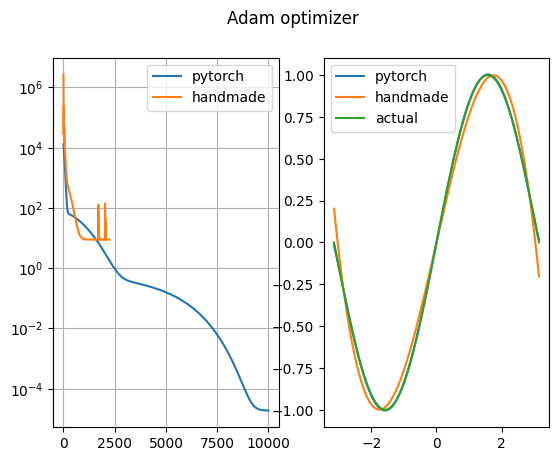

In [199]:
dump1, t = mesuare_time(lambda:
    polynom_approx(
        x, y, 6, 10000,
        lambda w: torch.optim.Adam(w, lr=0.01), torch.optim.lr_scheduler.ReduceLROnPlateau
    )
)
print(f"pytorch result = {dump1.w}, time = {t}s")

dump2, t = mesuare_time(lambda:
    approx.polynom_approx(
        nx, ny, 5,
        lambda f, df, x0: steepest_descent_adam(0.9, 0.999)(f, df, x0, fixed_step_search(0.1), steps(10000))
    )
)
print(f"handmade result = {dump2.w}, time = {t}s")

core.utils.plot_approx(nx, ny, [dump1, dump2]).suptitle('Adam optimizer')
plt.plot()

handmade result = [ 1.07168696e-17  9.99448124e-01 -3.95068154e-17 -1.65836144e-01
  1.83843179e-17  7.99797316e-03 -1.76017407e-18 -1.47696865e-04], time = 0.2730698585510254s


[]

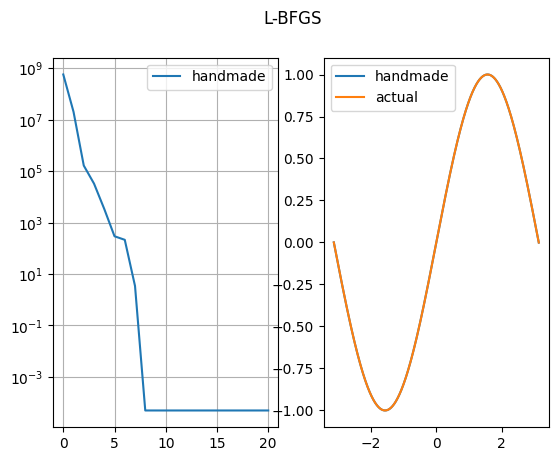

In [64]:
dump2, t = mesuare_time(lambda:
                        approx.polynom_approx(
                            nx, ny, 8,
                            lambda f, df, x0: newton_optimize(f, df, LBFGSNewtonDirectionApproximator(10), x0, fibonacci_search(200), steps(20))
                        )
                        )
print(f"handmade result = {dump2.w}, time = {t}s")

core.utils.plot_approx(nx, ny, [dump2]).suptitle('L-BFGS')
plt.plot()

In [0]:
dump, t = mesuare_time(lambda: polynom_approx(x, y, 6, 10000, lambda w: torch.optim.Adam(w, lr=0.01)))
print(f"result = {dump.w}, time = {t}s")

core.utils.plot_approx(nx, ny, [dump]).suptitle('Adam without scheduler')
plt.plot()

result = [ 0.0214053   0.8567368  -0.01616999 -0.09332981  0.00171643], time = 6.118537664413452s
result = [-3.7803052e-06  8.5672700e-01  2.6843732e-06 -9.3328394e-02
 -2.8004175e-07], time = 2.925220012664795s


[]

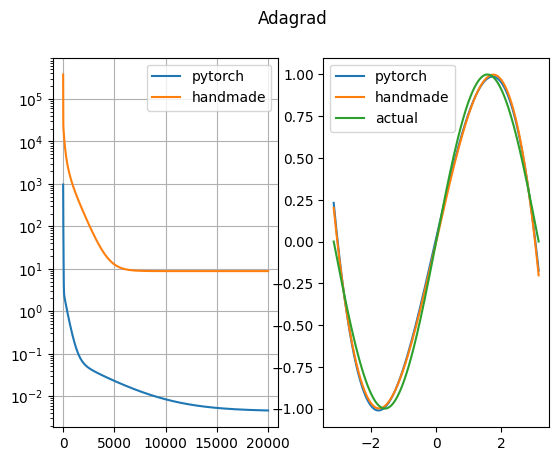

In [201]:
dump1, t = mesuare_time(lambda:
    polynom_approx(
        x, y, 5, 20000,
        lambda w: torch.optim.Adagrad(w, lr=0.1), torch.optim.lr_scheduler.ReduceLROnPlateau)
)
print(f"result = {dump1.w}, time = {t}s")

dump2, t = mesuare_time(lambda:
    approx.polynom_approx(
        nx, ny, 5,
        lambda f, df, x0: steepest_descent_adagrad(f, df, x0, fixed_step_search(0.1), steps(20000))
    )
)
print(f"result = {dump2.w}, time = {t}s")

core.utils.plot_approx(nx, ny, [dump1, dump2]).suptitle('Adagrad')
plt.plot()

result = [  0.38299644  -4.82271     -2.0736003  -45.87111   ], time = 6.466372489929199s
result = [1.0118033e+12 7.4962512e+15 5.8648193e+12 5.2700950e+16], time = 0.0009968280792236328s


C:\Users\Ilya\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[]

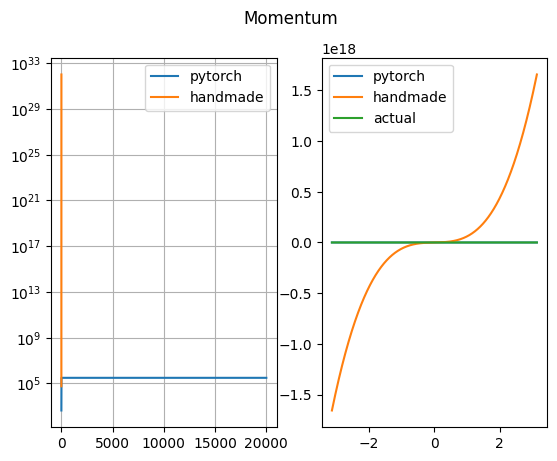

In [225]:
dump1, t = mesuare_time(lambda:
    polynom_approx(
        x, y, 4, 20000,
        lambda w: torch.optim.SGD(w, lr=0.1, momentum=0.1), lambda optimizer: torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    )
)

print(f"result = {dump1.w}, time = {t}s")

dump2, t = mesuare_time(lambda:
    approx.polynom_approx(
        nx, ny, 4,
        lambda f, df, x0: steepest_descent_with_momentum(0.1, True)(f, df, x0, fixed_step_search(0.01), steps(20000))
    )
)

print(f"result = {dump2.w}, time = {t}s")

core.utils.plot_approx(nx, ny, [dump1, dump2]).suptitle('Momentum')
plt.plot()

result = [ 5.4985173e-11  9.8931402e-01  7.8934708e-09 -1.5579236e-01
 -8.4153273e-10  5.6839031e-03], time = 7.423182010650635s
result = [ 5.0000811e-04  9.8730797e-01  4.9999426e-04 -1.5574288e-01
  5.0000392e-04  5.1401737e-03], time = 3.2690722942352295s


[]

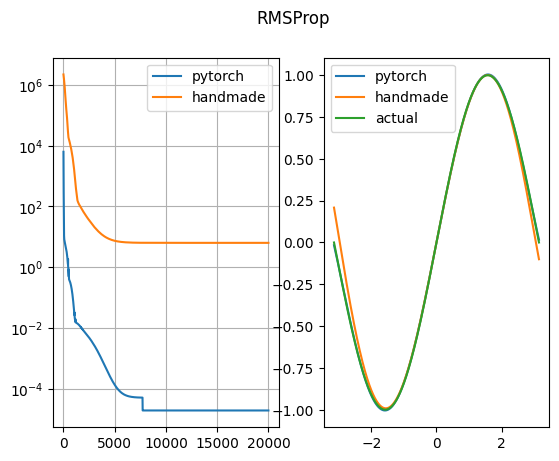

In [221]:
dump1, t = mesuare_time(lambda:
    polynom_approx(
        x, y, 6, 20000,
        torch.optim.RMSprop, torch.optim.lr_scheduler.ReduceLROnPlateau
    )
)

print(f"result = {dump1.w}, time = {t}s")

dump2, t = mesuare_time(lambda:
    approx.polynom_approx(
        nx, ny, 6,
        lambda f, df, x0: steepest_descent_rms_prop(0.5)(f, df, x0, fixed_step_search(0.001), steps(20000))
    )
)

print(f"result = {dump2.w}, time = {t}s")

core.utils.plot_approx(x, y, [dump1, dump2]).suptitle('RMSProp')
plt.plot()

### Выводы

1. Реализации из pytorch сходятся гораздо лучше, из-за чего они сливаются с реальным графиком
2. Собственная реализация работает заметно быстрее
3. В Pytorch достаточно удобный унифицированный интерфейс
4. В Pytorch встроенное символьное дифференцирование, что сильно упрощает разработку, но, скорее всего, является основной причиной долгой работы.